## Libraries
Several libraries are required on top of Python to build such a [network chart](https://python-graph-gallery.com/network-chart/)</a>.

`Matplotlib` is used for general plotting tasks like setting up the figure dpi and drawing the chart.

`NetworkX` is the go-to library when it comes to create network diagrams in Python. [netgraph](https://pypi.org/project/netgraph/) is a neat addition to `networkX`. It aims to complement existing network analysis libraries. You can install them with `pip3 install networkx` and `pip3 install netgraph`

Once those 3 libraries are installed, you can import them as follow:


In [2]:
# Import useful libraries
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph

## Dataset

This blog post is not based on a real dataset. Instead, I suggest to use some dummy data made using the `random_partition_graph()` function of the `networkX` library. You can check how to create a graph object from a pandas data frame in this [introduction to networkX](https://python-graph-gallery.com/320-basic-network-from-pandas-data-frame/).

In [3]:
# Create a modular graph (dummy data)
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)


That's it! We now have an object called `g` that `networkX` knows how to read. We are now able to use the `Graph` function to create some network diagrams.

## First network graph

Let's start with a first simple network chart. The `Graph` function is pretty magical in the sense that it will output something for us using some **default** parameter. Unfortunately, the output is rather disappointing for now.

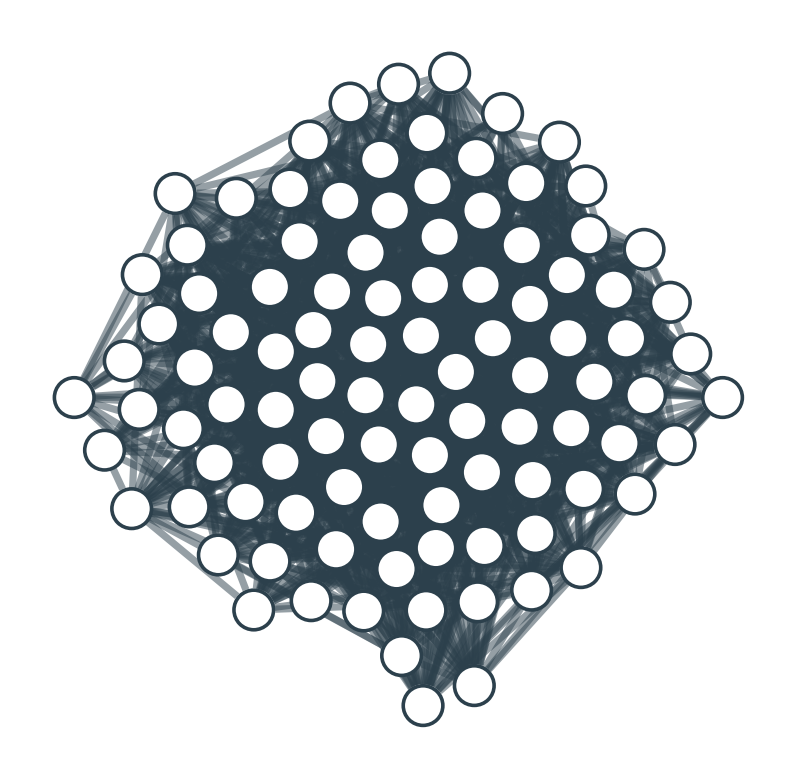

In [17]:
%%capture --no-display
# ^ Hide annoying warning for this cell

# Build graph
Graph(g)

## Apply customization to the network graph

Now, let's use the option of the `Graph` to get something a bit more good looking.

The first thing we need is to get some color for the nodes based on their community:

In [5]:
# Create a dictionary mapping nodes to their community. 
# This information is used position nodes according to their community 
# when using the `community` node layout in netgraph.
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

Now, let's make a good looking network diagram

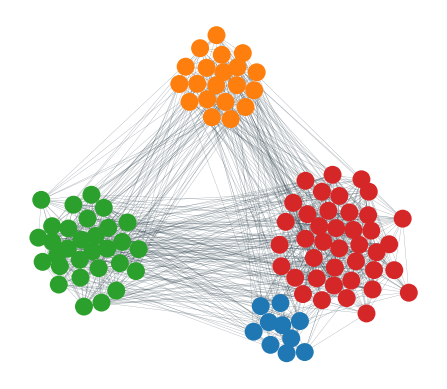

In [6]:
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

That's already much better!

But one problem remains here. There are a bunch of edges **overlapping** each other. It makes the figure cluttered and messy. We could definitely **bundle** the edges together since we know the community each node belongs to.

## Network diagram with bundling

Fortunately, the `Graph` function has a `edge_layout` attribute that does exactly this for us. We just need to use the `bundled` option to bundle the edges together. All the edges from a group will be attracted one to each other, building a much more attractive figure:

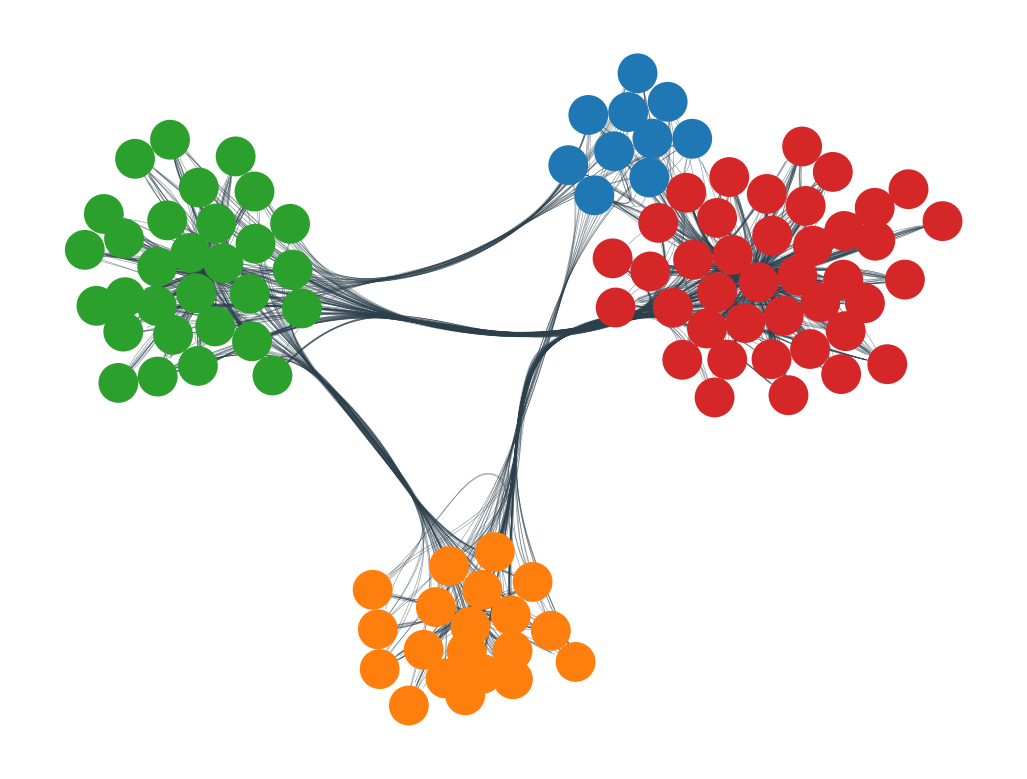

In [19]:
# Use the edge_layout option to bundle the edges together
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, 
      node_edge_width=0,     
      edge_width=0.1,        
      edge_alpha=0.5,        
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', # this is where bundling is made possible
      ax=ax,
)
plt.show()